In [1]:
from IPython.display import display
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import msreport

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load qtables

In [3]:
qtable_dir = "../qtable_data"
qtable_basenames = [
    "GFP-Atg8_acetylated",
    "GFP-Atg8_untreated",
]
output_dir = "../plots/figure_4"
treatments = ["GFP-Atg8_untreated", "GFP-Atg8_acetylated"]
colors = {
    "GFP-Atg8_untreated": "#808080",  # "#00CAC0",
    "GFP-Atg8_acetylated": "#E73C40",  # "#FD4C54",
}
light_colors = {
    "GFP-Atg8_untreated": "#B0B0B0",  # "#83e3da",
    "GFP-Atg8_acetylated": "#f18a8c", # "#fe9498",
}
treatment_labels = {
    "GFP-Atg8_untreated": "Mock treated",
    "GFP-Atg8_acetylated": "S-NHS-Ac treated",
}

In [4]:
qtables = {}
for qtable_basename in qtable_basenames: 
    qtable = msreport.Qtable.load(qtable_dir, qtable_basename)
    qtables[qtable_basename] = qtable

## Plot figure

In [5]:
figname = "bar_plots_protein_count_acetylated_vs_untreated.pdf"
figpath = os.path.join(output_dir, figname)

In [6]:
protein_numbers = []
xtick_labels = []
labels = []
categories = []
xlabel = "GFP-Atg8"
for treatment in treatments:
    qtable = qtables[treatment]
    experiments = qtable.design["Experiment"].unique()
    experiments = sorted(experiments, key=lambda x: "Atg8" in x)
    for experiment in experiments:
        mask = (qtable[f"Events {experiment}"] >= 2) & ~qtable["Potential contaminant"]
        protein_numbers.append(mask.sum())
        xtick_labels.append("+" if "Atg8" in experiment else "-")
        categories.append(treatment)
    labels.extend([treatment_labels[treatment], "_NONE"])

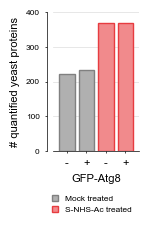

In [7]:
fig, ax = plt.subplots(figsize=[1.1, 1.8])
x_positions = range(len(protein_numbers))
ax.bar(
    x_positions,
    protein_numbers,
    color=[light_colors[t] for t in categories],
    edgecolor=[colors[t] for t in categories],
    label=labels,
    lw=1,
    zorder=2
)

# Spines
sns.despine(right=True, top=True, left=False, bottom=False)
for spine in ax.spines.values():
    spine.set_color("#000000")
    spine.set_linewidth(0.5)
ax.spines["left"].set_position(("outward", 5))

# Set limits
ax.set_xlim((ax.get_xlim()[0] - 0.1, ax.get_xlim()[1] + 0.1))
ax.set_ylim(0, 400)

# Adjust grind lines
ax.yaxis.grid(
    which="both",
    linestyle="solid",
    # dashes=(4, 1.5),
    lw=0.5,
    alpha=1,
    color="#DDDDDD",
    zorder=0,
)
ax.xaxis.grid(False, which="both")

# Tick and tick labels
ax.tick_params(
    direction="out",
    length=1.5,
    width=0.5,
    colors="#000000",
    top=False,
    right=False,
    labelsize=6,
)
ax.yaxis.set_major_locator(plt.MultipleLocator(100))

ax.set_ylabel("# quantified yeast proteins", fontsize=8)
ax.set_xlabel(xlabel, fontsize=8)
ax.set_xticks(x_positions, xtick_labels, rotation=0, fontsize=8)
    
legend = ax.legend(
    handlelength=0.7,
    fontsize=6,
    loc="lower left",
    bbox_to_anchor=(-0.1, -0.5),
    frameon=False,
)
legend._legend_box.align = "left"

fig.savefig(figpath, dpi=300)